# Creating Data

      subjects    S prime    R        rt
361          1  cat  WOOF  dog  0.369526
2617         1  cat  WOOF  dog  0.695785
3013         1  dog  WOOF  dog  0.749988
1117         1  dog  MEOW  cat  0.372379
2257         1  cat  MEOW  cat  0.351478


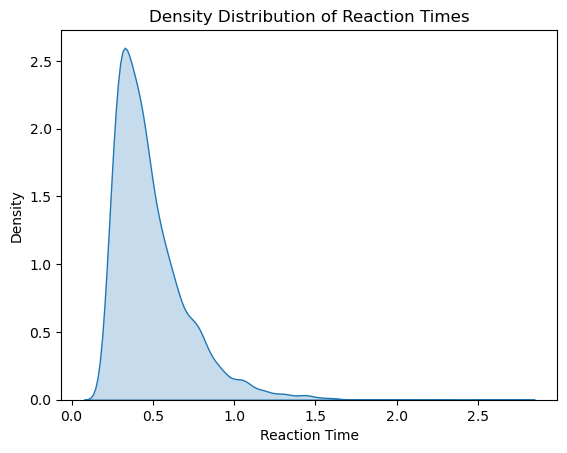

<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset-23.tsv', sep='\t')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Plot the density distribution of reaction times
sns.kdeplot(df['rt'], fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times')
plt.show()
plt.savefig('reaction_times.png')

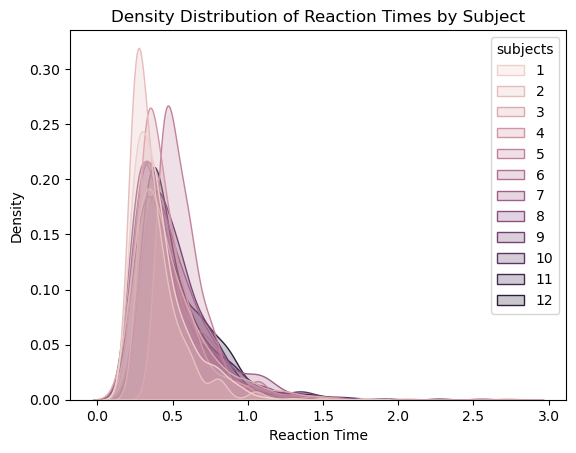

<Figure size 640x480 with 0 Axes>

In [28]:
# Play with the data
sns.kdeplot(data=df, x='rt', hue='subjects', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Subject')
plt.show()
plt.savefig('density_distribution_by_subject.png')

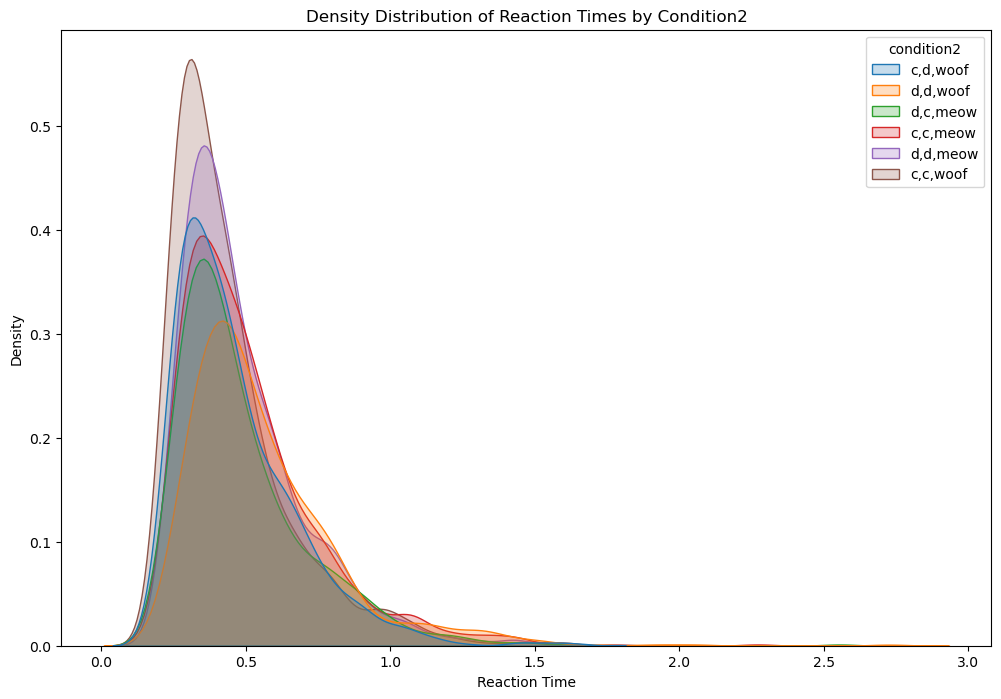

<Figure size 640x480 with 0 Axes>

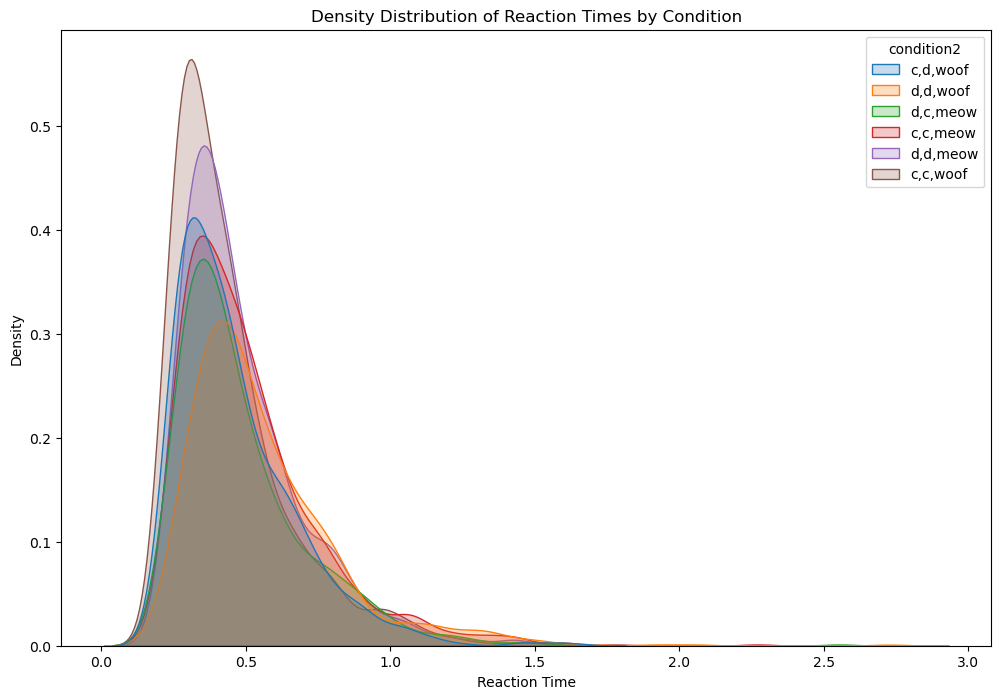

condition
S=R!=prime    2081
S=R=prime     1743
R!=S=prime    1017
S!=R=prime     679
Name: count, dtype: int64
s=cat, prime=MEOW: 1380
s=cat, prime=WOOF: 1380
s=dog, prime=MEOW: 1380
s=dog, prime=WOOF: 1380


,Condition,Count
0,S=R!=prime,2081
1,S=R=prime,1743
2,R!=S=prime,1017
3,S!=R=prime,679


<Figure size 640x480 with 0 Axes>

In [29]:
# Create a new column to categorize the conditions under assumption cat=dog
df['condition'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'dog') & (df['S'] == 'dog'), 'condition'] = 'S=R=prime'
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'cat') & (df['S'] == 'cat'), 'condition'] = 'S=R=prime'
#S=R!=prime
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'dog') & (df['S'] == 'dog'), 'condition'] = 'S=R!=prime'
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'cat') & (df['S'] == 'cat'), 'condition'] = 'S=R!=prime'
#R!=S=prime
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'dog') & (df['S'] == 'cat'), 'condition'] = 'R!=S=prime'
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'cat') & (df['S'] == 'dog'), 'condition'] = 'R!=S=prime'
#S!=R=prime
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'dog') & (df['S'] == 'cat'), 'condition'] = 'S!=R=prime'
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'cat') & (df['S'] == 'dog'), 'condition'] = 'S!=R=prime'



# Create a new column to categorize the conditions under assumption cat=dog
df['condition2'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'dog') & (df['S'] == 'dog'), 'condition2'] = 'd,d,woof'
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'cat') & (df['S'] == 'cat'), 'condition2'] = 'c,c,meow'
#S=R!=prime
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'dog') & (df['S'] == 'dog'), 'condition2'] = 'd,d,meow'
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'cat') & (df['S'] == 'cat'), 'condition2'] = 'c,c,woof'
#R!=S=prime
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'dog') & (df['S'] == 'cat'), 'condition2'] = 'd,c,meow'
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'cat') & (df['S'] == 'dog'), 'condition2'] = 'c,d,woof'
#S!=R=prime
df.loc[(df['prime'] == 'WOOF') & (df['R'] == 'dog') & (df['S'] == 'cat'), 'condition2'] = 'c,d,woof'
df.loc[(df['prime'] == 'MEOW') & (df['R'] == 'cat') & (df['S'] == 'dog'), 'condition2'] = 'd,c,meow'

# Plot the density distribution of reaction times for each condition2
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition2', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition2')
plt.show()
plt.savefig('density_distributiontest.png')


# Plot the density distribution of reaction times for each condition under assumption that cat=dog
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition2', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition')
plt.show()
plt.savefig('density_distributioncat=dog.png')
# Calculate the absolute occurrences of each category for 
category_counts = df['condition'].value_counts()
print(category_counts)



# Checking if initial distribution of meow, woof, cat, dog is balanced

# Count the occurrences for each combination of 'S' and 'prime'
s_cat_prime_meow = df[(df['S'] == 'cat') & (df['prime'] == 'MEOW')].shape[0]
s_cat_prime_woof = df[(df['S'] == 'cat') & (df['prime'] == 'WOOF')].shape[0]
s_dog_prime_meow = df[(df['S'] == 'dog') & (df['prime'] == 'MEOW')].shape[0]
s_dog_prime_woof = df[(df['S'] == 'dog') & (df['prime'] == 'WOOF')].shape[0]

print(f"s=cat, prime=MEOW: {s_cat_prime_meow}")
print(f"s=cat, prime=WOOF: {s_cat_prime_woof}")
print(f"s=dog, prime=MEOW: {s_dog_prime_meow}")
print(f"s=dog, prime=WOOF: {s_dog_prime_woof}")
# The distribution is balanced

# Create a contingency table for the counts of each condition
contingency_table = pd.DataFrame({
    'Condition': ['S=R!=prime', 'S=R=prime', 'R!=S=prime', 'S!=R=prime'],
    'Count': [category_counts['S=R!=prime'], category_counts['S=R=prime'], category_counts['R!=S=prime'], category_counts['S!=R=prime']]
})

# Display the contingency table
contingency_table




how does that make sense?



<img src="idea.png" alt="Idea" width="400"/>



![Idea](idea.png)

next steps, with H_0 and H_A, respectively, dog=cat and dog!=cat. Do a two sided t-test for the dog=cat H. 

Use Welch's test for not matching variances. 
Also, think about what a density plot shows, better to put in quantative measures. 

Then think about how to analyze